<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.178686,74.369731,39.665369,0.111588,190.325374,190.288363,0.037011
1,0.0,1.0,97.568082,63.655091,87.638501,-0.379995,258.481679,258.734586,-0.252906
2,0.0,2.0,75.341221,47.275650,44.281616,0.175853,177.074339,177.093754,-0.019415
3,0.0,3.0,96.670873,57.874667,89.426275,-0.429048,253.542767,253.870436,-0.327669
4,0.0,4.0,77.515824,54.615434,98.553875,0.028321,240.713453,240.584705,0.128748
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.672020,50.412396,26.010787,0.167710,182.262914,182.229476,0.033438
19996,999.0,16.0,89.139311,50.706413,68.478112,-0.190879,218.132958,218.499876,-0.366918
19997,999.0,17.0,37.284123,72.085986,34.176354,-0.038382,153.508081,153.487182,0.020899
19998,999.0,18.0,67.365047,94.245649,80.286413,0.425952,252.323061,251.955801,0.367260


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.178686,74.369731,39.665369,0.111588,190.325374,190.288363,0.037011
1,0.0,1.0,97.568082,63.655091,87.638501,-0.379995,258.481679,258.734586,-0.252906
2,0.0,2.0,75.341221,47.275650,44.281616,0.175853,177.074339,177.093754,-0.019415
3,0.0,3.0,96.670873,57.874667,89.426275,-0.429048,253.542767,253.870436,-0.327669
4,0.0,4.0,77.515824,54.615434,98.553875,0.028321,240.713453,240.584705,0.128748
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.672020,50.412396,26.010787,0.167710,182.262914,182.229476,0.033438
19996,999.0,16.0,89.139311,50.706413,68.478112,-0.190879,218.132958,218.499876,-0.366918
19997,999.0,17.0,37.284123,72.085986,34.176354,-0.038382,153.508081,153.487182,0.020899
19998,999.0,18.0,67.365047,94.245649,80.286413,0.425952,252.323061,251.955801,0.367260


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.178686,74.369731,39.665369,0.111588,190.325374,190.288363,0.037011
1,0.0,1.0,97.568082,63.655091,87.638501,-0.379995,258.481679,258.734586,-0.252906
2,0.0,2.0,75.341221,47.275650,44.281616,0.175853,177.074339,177.093754,-0.019415
3,0.0,3.0,96.670873,57.874667,89.426275,-0.429048,253.542767,253.870436,-0.327669
4,0.0,4.0,77.515824,54.615434,98.553875,0.028321,240.713453,240.584705,0.128748
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.672020,50.412396,26.010787,0.167710,182.262914,182.229476,0.033438
19996,999.0,16.0,89.139311,50.706413,68.478112,-0.190879,218.132958,218.499876,-0.366918
19997,999.0,17.0,37.284123,72.085986,34.176354,-0.038382,153.508081,153.487182,0.020899
19998,999.0,18.0,67.365047,94.245649,80.286413,0.425952,252.323061,251.955801,0.367260


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

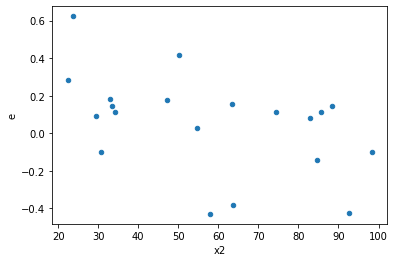

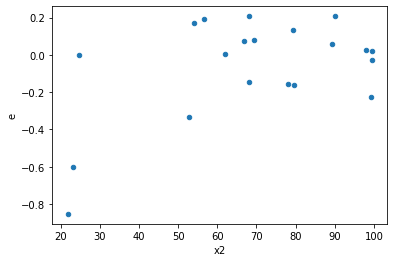

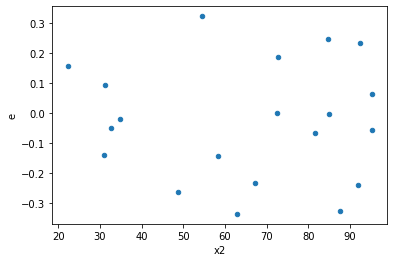

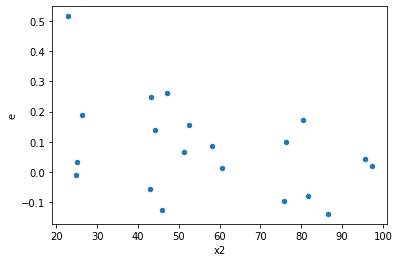

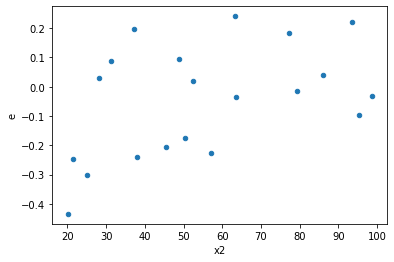

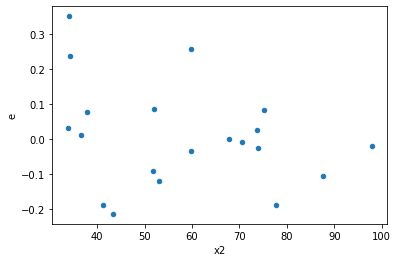

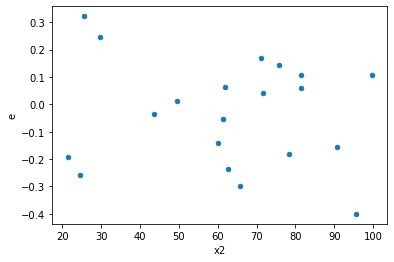

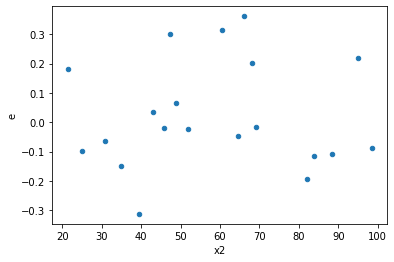

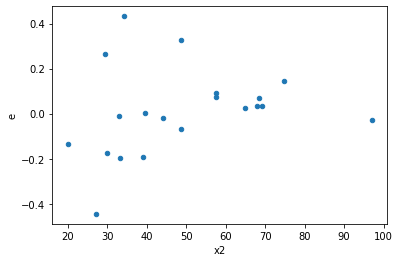

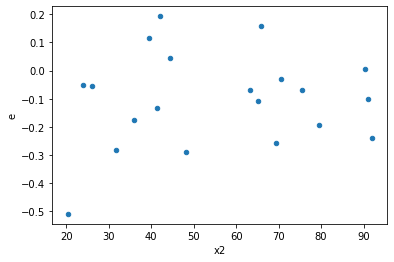

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,5.0,0.10604228116179983,0.08172640071515411,0.026510570290449956,0.020431600178788527,1.2975278518797777,0.7819942061789993,0.6090028969105004,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.07364986370923088,0.07068068515029029,0.01841246592730772,0.017670171287572572,1.042008344325287,0.9650831541956468,0.5174584229021766,Reject001=1 : Homoscedasticity
14.0,5.0,5.0,0.13185106648783482,0.12315869435471077,0.032962766621958704,0.030789673588677693,1.0705786317293122,0.9421666921885885,0.5289166539057057,Reject001=1 : Homoscedasticity
18.0,5.0,5.0,0.2315937363065873,0.15706413379976356,0.057898434076646826,0.03926603344994089,1.4745170059119885,0.680407998462643,0.6597960007686785,Reject001=1 : Homoscedasticity
22.0,5.0,5.0,0.2029577397338466,0.09166455667838845,0.05073943493346165,0.022916139169597113,2.2141353985481884,0.4034710918944271,0.7982644540527865,Reject001=1 : Homoscedasticity
30.0,5.0,5.0,0.1277000835303968,0.07112114197789961,0.0319250208825992,0.017780285494474902,1.7955291489846816,0.5362168941648418,0.7318915529175791,Reject001=1 : Homoscedasticity
33.0,5.0,5.0,0.10186891331042773,0.05079416098154299,0.025467228327606933,0.012698540245385748,2.0055240866650736,0.4632805533261126,0.7683597233369437,Reject001=1 : Homoscedasticity
35.0,5.0,5.0,0.21017496193989063,0.08516111757183852,0.05254374048497266,0.02129027939295963,2.467968574538673,0.34400426553038876,0.8279978672348056,Reject001=1 : Homoscedasticity
38.0,5.0,5.0,0.14984104429934517,0.06996149825229953,0.03746026107483629,0.01749037456307488,2.1417643710113103,0.42296780038262827,0.7885160998086859,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.06926242796334876,0.10128556514243185,0.01731560699083719,0.025321391285607963,0.6838331589101482,0.6868276200137418,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.10604228116179983,0.08172640071515411,0.026510570290449956,0.020431600178788527,1.2975278518797777,1.2180057938210007,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.02095418403290344,0.18602717263453636,0.00523854600822586,0.04650679315863409,0.11264044782355227,0.031664171413099254,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.07189978122435599,0.12007055733985128,0.017974945306088997,0.03001763933496282,0.5988127549108372,0.5872945763090912,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.08003603523944759,0.2579767672671661,0.020009008809861898,0.06449419181679153,0.3102451282233512,0.22480383707074797,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.023888959048851164,0.04432579345511216,0.005972239762212791,0.01108144836377804,0.5389403592525204,0.5139058918499956,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.07364986370923088,0.07068068515029029,0.01841246592730772,0.017670171287572572,1.042008344325287,1.0349168458043532,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.13904306151692797,0.23211390172213162,0.03476076537923199,0.058028475430532904,0.5990294441018845,0.5875556272943553,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.013114756988139638,0.40095327616660154,0.0032786892470349095,0.10023831904165038,0.032708940836014715,0.0018743502733731675,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      951
Reject001=0 : Heteroscedasticity     49
Name: Result_test, dtype: int64